In [98]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
from math import sqrt
import statsmodels.api as sm

In [55]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

In [56]:
boston_df.columns

Index(['Unnamed: 0', 'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS',
       'RAD', 'TAX', 'PTRATIO', 'LSTAT', 'MEDV'],
      dtype='object')

In [57]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


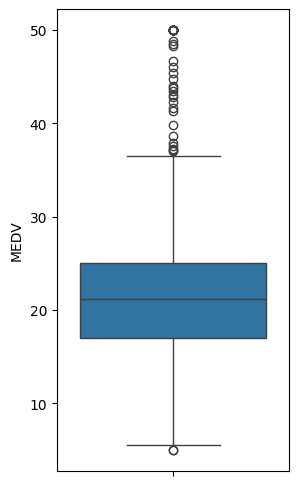

In [58]:
fig, ax = plt.subplots(figsize=(3, 6))
ax0 = sns.boxplot(y='MEDV', data=boston_df, ax=ax, showfliers=True)
plt.show()

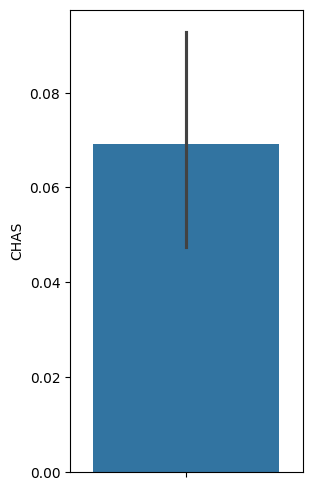

In [59]:
fig, ax = plt.subplots(figsize=(3, 6))
ax1 = sns.barplot(y='CHAS', data=boston_df, ax=ax)
plt.show()

In [78]:
boston_df.loc[(boston_df['AGE'] <= 35.0), 'AGE_GROUP'] = 0
boston_df.loc[((boston_df['AGE'] > 35.0) & (boston_df['AGE'] < 70.0)), 'AGE_GROUP'] = 1
boston_df.loc[(boston_df['AGE'] >= 70.0), 'AGE_GROUP'] = 2

[Text(0, 0, '35 years and younger'),
 Text(1, 0, 'between 35 and 70 years'),
 Text(2, 0, 'and 70 years and older')]

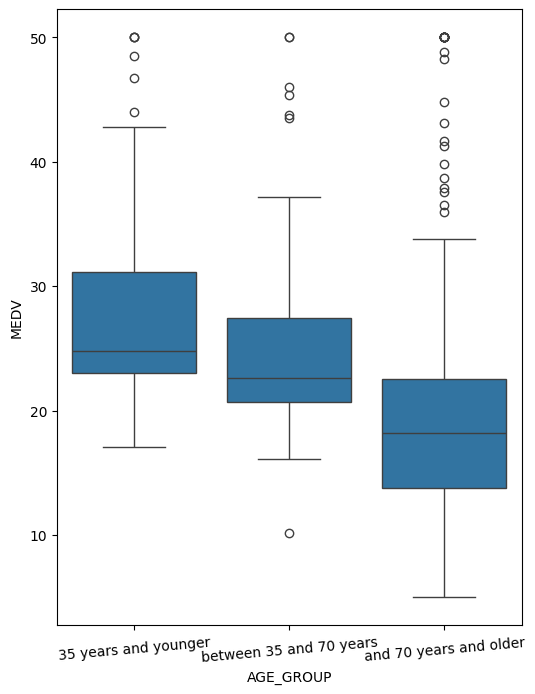

In [87]:
fig, ax = plt.subplots(figsize=(6, 8))
ax2 = sns.boxplot(x = 'AGE_GROUP', y = 'MEDV', data=boston_df, ax=ax)
ax2.set_xticks([0, 1, 2])
ax2.set_xticklabels(['35 years and younger', 'between 35 and 70 years', 'and 70 years and older'], rotation=5)

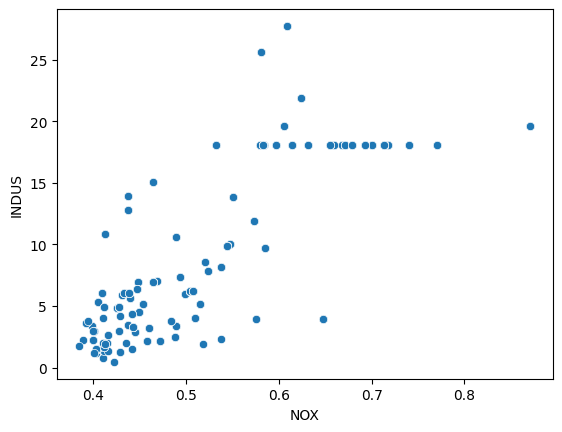

In [89]:
ax3 = sns.scatterplot(x = 'NOX', y = 'INDUS', data=boston_df)

In [103]:
X = boston_df['NOX']
y = boston_df['INDUS']
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  INDUS   R-squared:                       0.583
Model:                            OLS   Adj. R-squared:                  0.582
Method:                 Least Squares   F-statistic:                     705.1
Date:                Sat, 09 Mar 2024   Prob (F-statistic):           7.91e-98
Time:                        17:00:13   Log-Likelihood:                -1470.5
No. Observations:                 506   AIC:                             2945.
Df Residuals:                     504   BIC:                             2954.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -13.9414      0.965    -14.450      0.000     -15.837     -12.046
NOX           45.2108      1.703     26.554      0.000      41.866      48.556
==============================================================================
Omnibus:                       46.050   Durbin-Watson:                   0.272
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               67.622
Skew:                           0.649   Prob(JB):                     2.07e-15
Kurtosis:                       4.233   Cond. No.                         11.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [106]:
# Conclusion: p < 0.05 there is evidence of correlation between Nitric oxide concentrations and
# the proportion of non-retail business acres per town

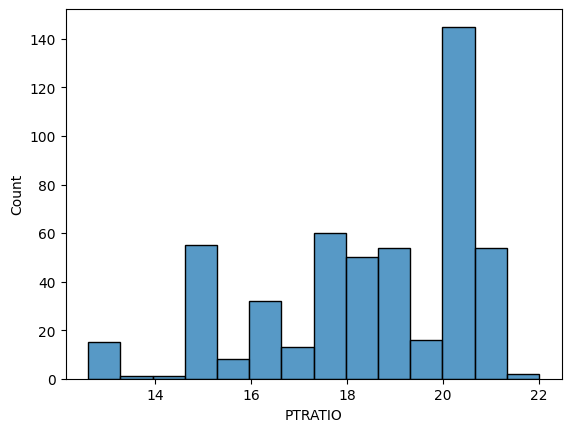

In [107]:
ax4 = sns.histplot(x = 'PTRATIO', data = boston_df)